In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1   

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bathsheba
Processing Record 2 of Set 1 | yar-sale
Processing Record 3 of Set 1 | saint-alexandre
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | boguchany
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | shuangyang
Processing Record 13 of Set 1 | kendari
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | henties bay
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | tapes
Processing Record 22 

Processing Record 37 of Set 4 | santa eulalia del rio
City not found. Skipping...
Processing Record 38 of Set 4 | bam
Processing Record 39 of Set 4 | hualmay
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | kaeo
Processing Record 45 of Set 4 | sabzevar
Processing Record 46 of Set 4 | tema
Processing Record 47 of Set 4 | oranjestad
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | aybak
City not found. Skipping...
Processing Record 50 of Set 4 | katobu
Processing Record 1 of Set 5 | suntar
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | chaah
Processing Record 4 of Set 5 | vestmannaeyjar
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | babanusah
City not found. Skipping...
Processing Recor

Processing Record 26 of Set 8 | slave lake
Processing Record 27 of Set 8 | nushki
Processing Record 28 of Set 8 | san pedro de macoris
Processing Record 29 of Set 8 | rognan
Processing Record 30 of Set 8 | lorengau
Processing Record 31 of Set 8 | bagdarin
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | ijaki
City not found. Skipping...
Processing Record 34 of Set 8 | kieta
Processing Record 35 of Set 8 | kuopio
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | sidi ali
Processing Record 38 of Set 8 | severo-kurilsk
Processing Record 39 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 40 of Set 8 | anadyr
Processing Record 41 of Set 8 | itaituba
Processing Record 42 of Set 8 | maicao
Processing Record 43 of Set 8 | ouadda
Processing Record 44 of Set 8 | altagracia de orituco
Processing Record 45 of Set 8 | nhulunbuy
Processing Record 46 of Set 8 | samarai
Processing Record 47 of Set 8 | antalya
Processing Record 48 of Set

City not found. Skipping...
Processing Record 14 of Set 12 | trollhattan
Processing Record 15 of Set 12 | labuhan
Processing Record 16 of Set 12 | pascagoula
Processing Record 17 of Set 12 | lahij
Processing Record 18 of Set 12 | bulungu
Processing Record 19 of Set 12 | juneau
Processing Record 20 of Set 12 | douentza
Processing Record 21 of Set 12 | leningradskiy
Processing Record 22 of Set 12 | shenjiamen
Processing Record 23 of Set 12 | salalah
Processing Record 24 of Set 12 | igarka
Processing Record 25 of Set 12 | kamenka
Processing Record 26 of Set 12 | bridlington
Processing Record 27 of Set 12 | paamiut
Processing Record 28 of Set 12 | longyearbyen
Processing Record 29 of Set 12 | luwuk
Processing Record 30 of Set 12 | westport
Processing Record 31 of Set 12 | matiguas
Processing Record 32 of Set 12 | cotorra
Processing Record 33 of Set 12 | piacabucu
Processing Record 34 of Set 12 | ormara
Processing Record 35 of Set 12 | thinadhoo
Processing Record 36 of Set 12 | gilbues
Proc

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,81.21,69,75,16.11,BB,2022-01-26 20:36:13
1,Yar-Sale,66.8333,70.8333,3.76,95,97,12.03,RU,2022-01-26 20:33:13
2,Saint-Alexandre,44.2278,4.6214,43.79,52,0,11.23,FR,2022-01-26 20:36:14
3,Castro,-24.7911,-50.0119,80.04,65,41,6.93,BR,2022-01-26 20:36:15
4,Boguchany,58.3814,97.4531,-11.40,100,98,2.30,RU,2022-01-26 20:32:17
5,Lagoa,39.0500,-27.9833,58.57,79,8,12.44,PT,2022-01-26 20:34:35
6,Alice Springs,-23.7000,133.8833,76.55,83,40,0.00,AU,2022-01-26 20:31:20
7,Vaini,-21.2000,-175.2000,82.56,83,20,3.44,TO,2022-01-26 20:36:15
8,Hermanus,-34.4187,19.2345,66.79,82,99,13.44,ZA,2022-01-26 20:36:16
9,Shuangyang,43.5242,125.6736,-5.84,96,39,3.36,CN,2022-01-26 20:36:16


In [11]:
# Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bathsheba,BB,2022-01-26 20:36:13,13.2167,-59.5167,81.21,69,75,16.11
1,Yar-Sale,RU,2022-01-26 20:33:13,66.8333,70.8333,3.76,95,97,12.03
2,Saint-Alexandre,FR,2022-01-26 20:36:14,44.2278,4.6214,43.79,52,0,11.23
3,Castro,BR,2022-01-26 20:36:15,-24.7911,-50.0119,80.04,65,41,6.93
4,Boguchany,RU,2022-01-26 20:32:17,58.3814,97.4531,-11.40,100,98,2.30
5,Lagoa,PT,2022-01-26 20:34:35,39.0500,-27.9833,58.57,79,8,12.44
6,Alice Springs,AU,2022-01-26 20:31:20,-23.7000,133.8833,76.55,83,40,0.00
7,Vaini,TO,2022-01-26 20:36:15,-21.2000,-175.2000,82.56,83,20,3.44
8,Hermanus,ZA,2022-01-26 20:36:16,-34.4187,19.2345,66.79,82,99,13.44
9,Shuangyang,CN,2022-01-26 20:36:16,43.5242,125.6736,-5.84,96,39,3.36


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

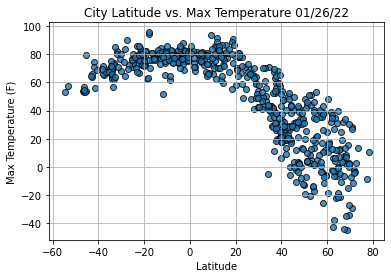

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

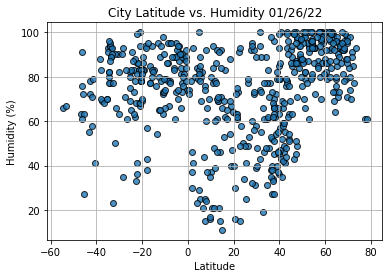

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

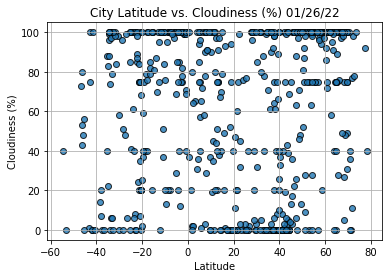

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

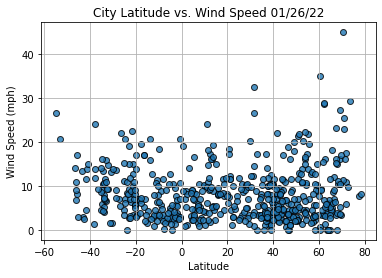

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()